## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2026-02-07 20:41:46--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  50.6MB/s    in 1.6s    

2026-02-07 20:41:47 (50.6 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0

## **Load bioactivity data**

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/MyDrive/Colab Notebooks/Bioinformatics"
!ls

/content/drive/MyDrive/Colab Notebooks/Bioinformatics
bioactivity_data.csv
bioactivity_preprocessed_data.csv
CDD_ML_Part_1_bioactivity_data.ipynb
CDD_ML_Part_2_Acetylcholinesterase_Exploratory_Data_Analysis.ipynb
Miniconda3-py37_4.8.2-Linux-x86_64.sh


In [3]:
import pandas as pd

In [38]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
256,CHEMBL5565685,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,14.0,active
257,CHEMBL5565858,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,48.0,NaN
258,CHEMBL4802135,CC(C)(C)[C@H](NC(=O)C(F)(F)F)C(=O)N1C[C@H]2[C@...,20.0,NaN
259,NaN,NaN,NaN,inactive


In [69]:
df.isna().sum()

,0
molecule_chembl_id,2
canonical_smiles,2
standard_value,2
bioactivity_class,2


In [70]:
df = df.dropna(subset=["canonical_smiles"]).reset_index(drop=True)

In [71]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [72]:
smiles = []

for i in df.canonical_smiles.tolist():
    if pd.isna(i):
        smiles.append(None)
    else:
        cpd = str(i).split('.')
        cpd_longest = max(cpd, key = len)
        smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [73]:
len(smiles)

259

In [74]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL187579,7200.0,intermediate,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21
1,CHEMBL188487,9400.0,intermediate,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21
2,CHEMBL185698,13500.0,inactive,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21
3,CHEMBL426082,13110.0,inactive,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21
4,CHEMBL187717,2000.0,intermediate,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]
...,...,...,...,...
254,CHEMBL5595277,52.0,active,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...
255,CHEMBL5570210,30.0,active,CC(C)c1ccc(F)c2[nH]c(C(=O)N3C[C@H]4[C@@H]([C@H...
256,CHEMBL5565685,14.0,active,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...
257,CHEMBL5565858,48.0,NaN,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [75]:
#!pip install rdkit

In [76]:
#!pip uninstall numpy -y
#!pip install numpy==1.26.4

In [77]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [78]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        #print(i)
        if pd.isna(elem):
            continue   # skip NaN
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)
    print(len(moldata))
    baseData= np.arange(1,1)
    i=0
    for mol in moldata:
        if mol is None:
            continue   # skip invalid SMILES
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [79]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

259


,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
254,436.512,1.47440,3.0,4.0
255,496.583,2.73690,3.0,4.0
256,471.985,2.06450,2.0,4.0
257,465.594,2.19130,2.0,4.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [80]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
254,436.512,1.47440,3.0,4.0
255,496.583,2.73690,3.0,4.0
256,471.985,2.06450,2.0,4.0
257,465.594,2.19130,2.0,4.0


In [81]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
254,CHEMBL5595277,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,52.0,active
255,CHEMBL5570210,CC(C)c1ccc(F)c2[nH]c(C(=O)N3C[C@H]4[C@@H]([C@H...,30.0,active
256,CHEMBL5565685,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,14.0,active
257,CHEMBL5565858,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,48.0,NaN


Now, let's combine the 2 DataFrame

In [82]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [83]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
254,CHEMBL5595277,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,52.0,active,436.512,1.47440,3.0,4.0
255,CHEMBL5570210,CC(C)c1ccc(F)c2[nH]c(C(=O)N3C[C@H]4[C@@H]([C@H...,30.0,active,496.583,2.73690,3.0,4.0
256,CHEMBL5565685,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,14.0,active,471.985,2.06450,2.0,4.0
257,CHEMBL5565858,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,48.0,NaN,465.594,2.19130,2.0,4.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

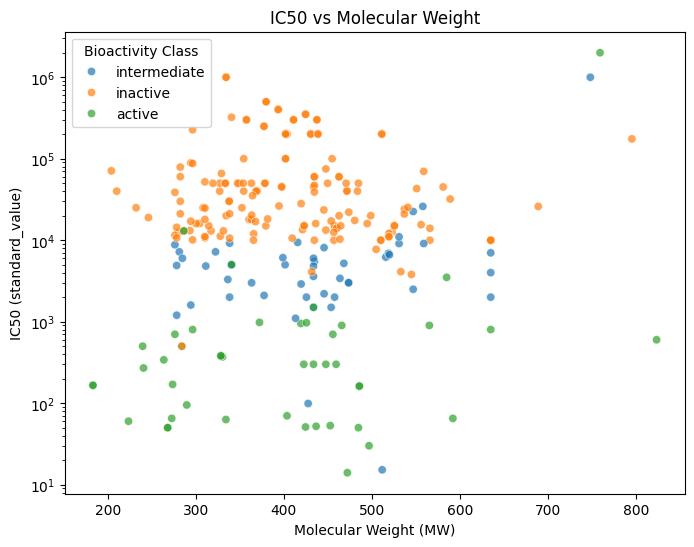

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_combined,
    x="MW",
    y="standard_value",
    hue="bioactivity_class",
    alpha=0.7
)

plt.yscale("log")  # IC50 is usually log-scaled
plt.xlabel("Molecular Weight (MW)")
plt.ylabel("IC50 (standard_value)")
plt.title("IC50 vs Molecular Weight")
plt.legend(title="Bioactivity Class")
plt.show()

In [98]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(columns=['standard_value_norm'])

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [88]:
df_combined.standard_value.describe()

,standard_value
count,2.590000e+02
mean,6.526248e+04
std,1.807599e+05
min,1.400000e+01
25%,3.550000e+03
50%,1.400000e+04
75%,4.500000e+04
max,2.000000e+06


In [89]:
-np.log10( (10**-9)* 100000000 )

1.0

In [90]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [91]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop(columns=['standard_value'])

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [92]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,2000.0
...,...,...,...,...,...,...,...,...
254,CHEMBL5595277,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,active,436.512,1.47440,3.0,4.0,52.0
255,CHEMBL5570210,CC(C)c1ccc(F)c2[nH]c(C(=O)N3C[C@H]4[C@@H]([C@H...,active,496.583,2.73690,3.0,4.0,30.0
256,CHEMBL5565685,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,active,471.985,2.06450,2.0,4.0,14.0
257,CHEMBL5565858,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,NaN,465.594,2.19130,2.0,4.0,48.0


In [94]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,2.590000e+02
mean,6.526248e+04
std,1.807599e+05
min,1.400000e+01
25%,3.550000e+03
50%,1.400000e+04
75%,4.500000e+04
max,2.000000e+06


In [99]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
254,CHEMBL5595277,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,active,436.512,1.47440,3.0,4.0,7.283997
255,CHEMBL5570210,CC(C)c1ccc(F)c2[nH]c(C(=O)N3C[C@H]4[C@@H]([C@H...,active,496.583,2.73690,3.0,4.0,7.522879
256,CHEMBL5565685,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,active,471.985,2.06450,2.0,4.0,7.853872
257,CHEMBL5565858,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,NaN,465.594,2.19130,2.0,4.0,7.318759


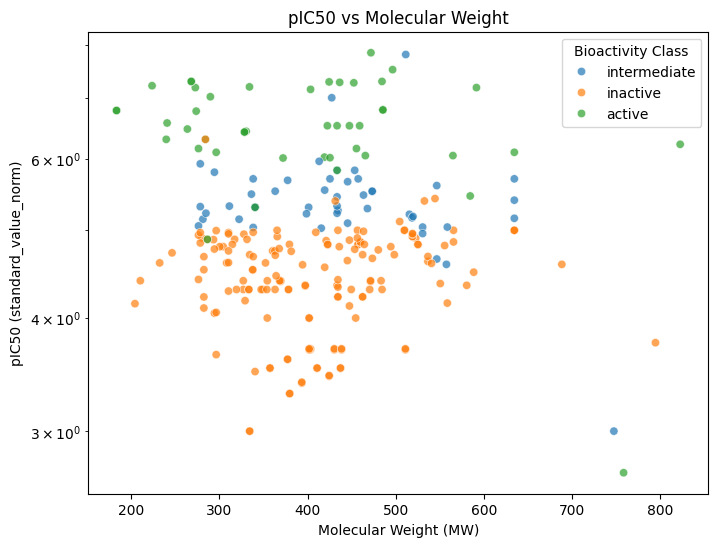

In [100]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_final,
    x="MW",
    y="pIC50",
    hue="bioactivity_class",
    alpha=0.7
)

plt.yscale("log")  # pIC50 is usually log-scaled
plt.xlabel("Molecular Weight (MW)")
plt.ylabel("pIC50 (standard_value_norm)")
plt.title("pIC50 vs Molecular Weight")
plt.legend(title="Bioactivity Class")
plt.show()

In [101]:
#Have scaled the down the column by 10**6

In [ ]:
df_final.pIC50.describe()

count    4695.000000
mean        5.820864
std         1.552813
min         1.000000
25%         4.756219
50%         5.648590
75%         6.903090
max        11.221849
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [123]:
df_final.to_csv('bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [103]:
df_2class = df_final[df_final['bioactivity_class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...
254,CHEMBL5595277,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,active,436.512,1.47440,3.0,4.0,7.283997
255,CHEMBL5570210,CC(C)c1ccc(F)c2[nH]c(C(=O)N3C[C@H]4[C@@H]([C@H...,active,496.583,2.73690,3.0,4.0,7.522879
256,CHEMBL5565685,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,active,471.985,2.06450,2.0,4.0,7.853872
257,CHEMBL5565858,CC1(C)[C@@H]2[C@@H](C(=O)N[C@H](C=O)C[C@@H]3CC...,NaN,465.594,2.19130,2.0,4.0,7.318759


Let's write this to CSV file.

In [ ]:
#df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Frequency plot of the 2 bioactivity classes**

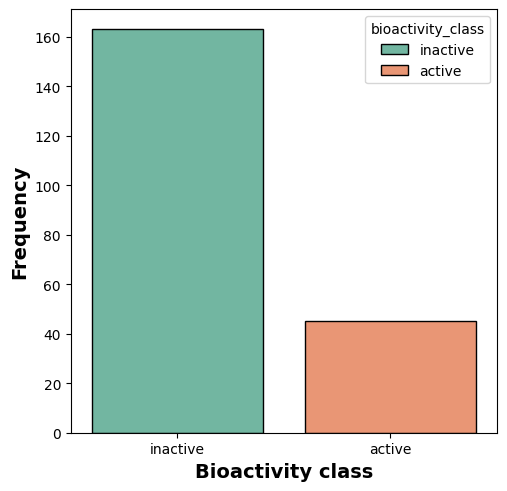

In [106]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, hue='bioactivity_class', palette='Set2', edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

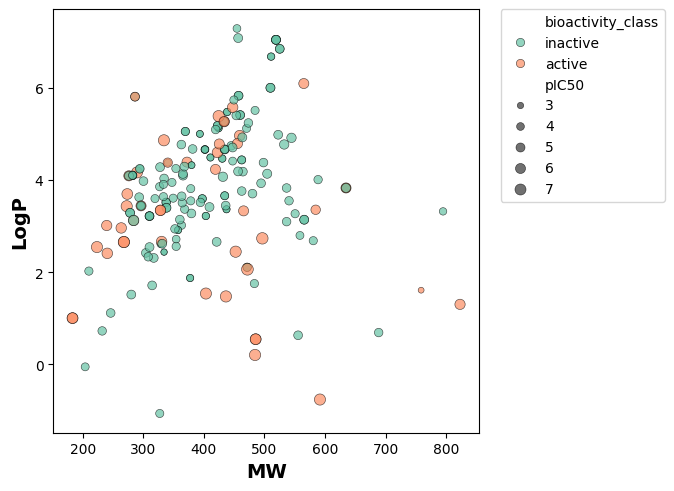

In [107]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', palette='Set2', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

/tmp/ipython-input-3887632931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class, palette='Set2')


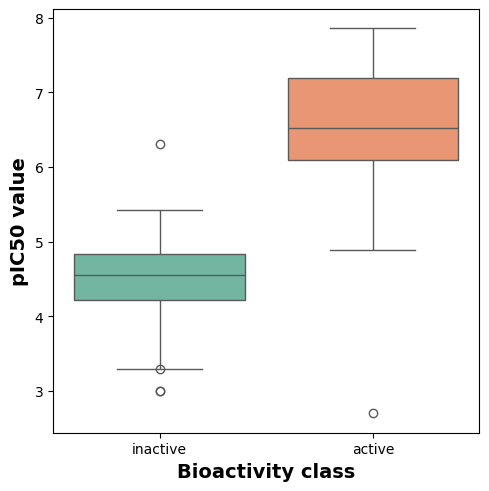

In [109]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class, palette='Set2')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

inactive has big outlier on both ends whereas active just has it on one end

**Statistical analysis | Mann-Whitney U Test**

In [112]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [113]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,7122.5,4.152043e-22,0.05,Different distribution (reject H0)


#### **MW**

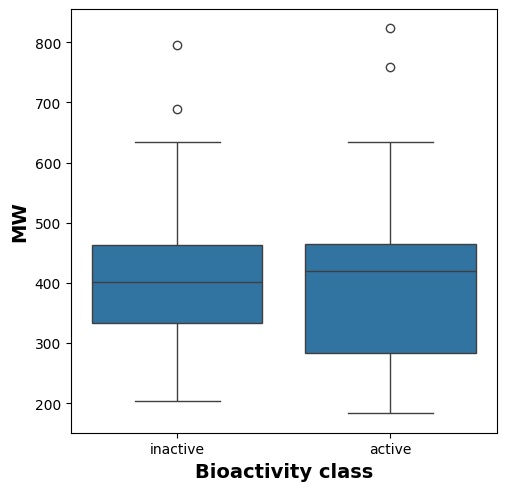

In [114]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [115]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3289.5,0.290874,0.05,Same distribution (fail to reject H0)


#### **LogP**

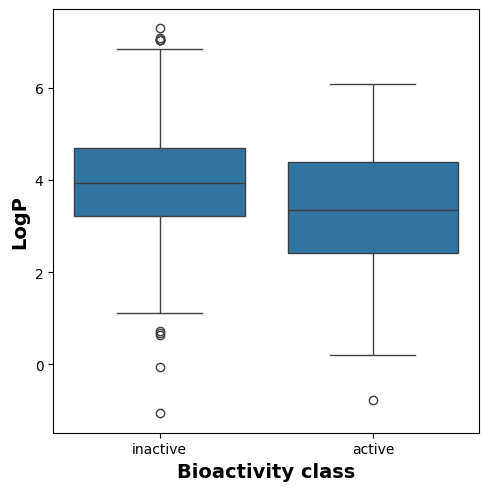

In [116]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [117]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2728.5,0.008644,0.05,Different distribution (reject H0)


#### **NumHDonors**

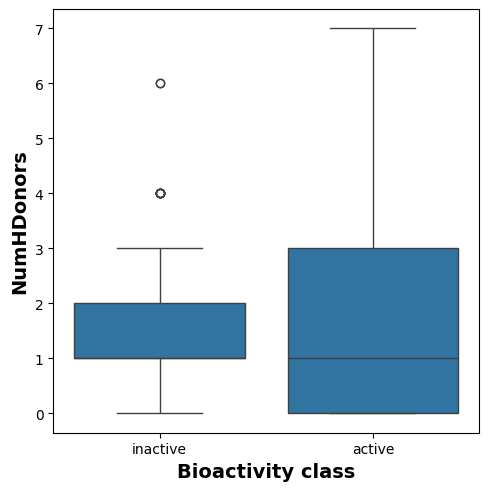

In [118]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [119]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3325.5,0.320377,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

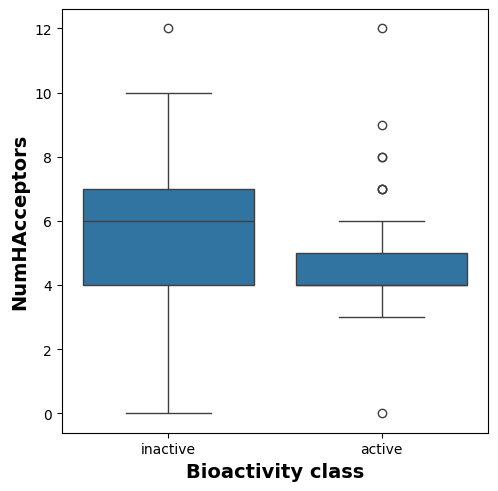

In [120]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [121]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2690.5,0.005665,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_pIC50.csv (deflated 14%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: 05_acetylcholinesterase_bioactivity_data_2class_pIC50.csv (deflated 76%)
  adding: mannwhitneyu_MW.csv (deflated 10%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 82%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: plot_MW.pdf (deflated 38%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: 04_acetylcholinesterase_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
